In [1]:
%matplotlib inline

# Ridge regression

In [2]:
import matplotlib.pyplot as plt
from numpy import *

## Generate data

We generate a model with a lot of noise and not too many examples. In such a setup, the least squares estimate is expected to overfit to the noise, and we expect ridge regression to perform better for some regularization parameter $\lambda$.

In [18]:
d = 20
n = 40
sigma = 0.7

theta = random.randn(d)
X = random.rand(n,d)

y = dot(X,theta) + sigma*random.randn(n)

Define the Ridge Regression Estimate (RRE) and the Normalized Mean Squared Error (NMSE) 

In [19]:
def RRE(X,y,lam):
    inv = linalg.inv( dot(X.T,X) + lam*diag(ones(d)) )
    return dot( inv ,  dot(X.T,y) )
def NMSE(x,y):
    return linalg.norm(x)**2 / linalg.norm(y)**2

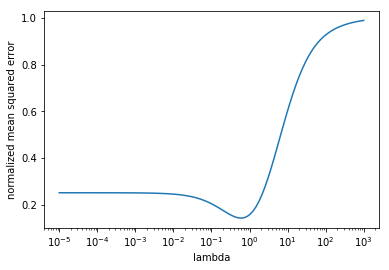

In [20]:
lams = logspace(-5, 3, num=100)
path = [NMSE(theta - RRE(X,y,lam), theta) for lam in lams]
plt.semilogx(lams,path)
plt.xlabel('lambda')
plt.ylabel('normalized mean squared error')
plt.show()
savetxt("../lecture_notes/fig/ridge_regression_mse.dat",array([lams,path]).T)

The coefficients are shrunk to zero:

In [21]:
coeffs = array([RRE(X,y,lam) for lam in lams])

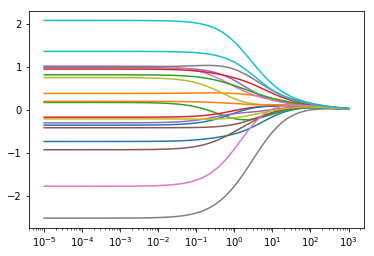

In [33]:
for c in coeffs.T:
    plt.semilogx(lams,c)
plt.show()
savetxt("../lecture_notes/fig/ridge_regression_coeffs.dat",vstack((lams,coeffs.T)).T)